In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


from importnb import imports
with imports("ipynb"):
    import setUp 
    
X = setUp.X
y = setUp.y
X_train , X_test , y_train , y_test = setUp.X_train , setUp.X_test , setUp.y_train , setUp.y_test

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

log_reg_grid = {
    "C" : np.logspace(-4 , 4, 30),
    "solver" :['liblinear']
}


gs_log_res = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv = 5,
    verbose=True
)


gs_log_res.fit(X_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [4]:
gs_log_res.score(X_test , y_test)

0.8852459016393442

In [5]:

y_pred = gs_log_res.predict(X_test)

y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Now we will find each one(precision , recall , f1-score) using cross validation

In [7]:
#lets first create a function

from sklearn.model_selection import cross_val_score

def crossValScore(model , scoreParameters):
    val = cross_val_score(
        model,
        X,
        y,
        cv = 5,
        scoring=scoreParameters
    )
    
    return np.mean(val)
    

In [8]:
gs_log_res.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [19]:
clf = LogisticRegression(C=0.20433597178569418 , solver='liblinear')

cv_acc = crossValScore(clf , 'accuracy')
cv_acc

0.8446994535519124

In [10]:
cv_precisions = crossValScore(clf , 'precision')

cv_precisions


0.8207936507936507

In [11]:
cv_recall = crossValScore(clf , 'recall')

cv_recall

0.9212121212121213

In [12]:
cv_f1 = crossValScore(clf , 'f1')

cv_f1

0.8673007976269721

In [13]:
cv_metrics = pd.DataFrame({
    "Accuracy" : cv_acc,
    "Precision" : cv_precisions,
    "Recall" : cv_recall,
    "F1" : cv_f1
}, index=['Score:'])


cv_metrics


,Accuracy,Precision,Recall,F1
Score:,0.841366,0.820794,0.921212,0.867301


<Axes: >

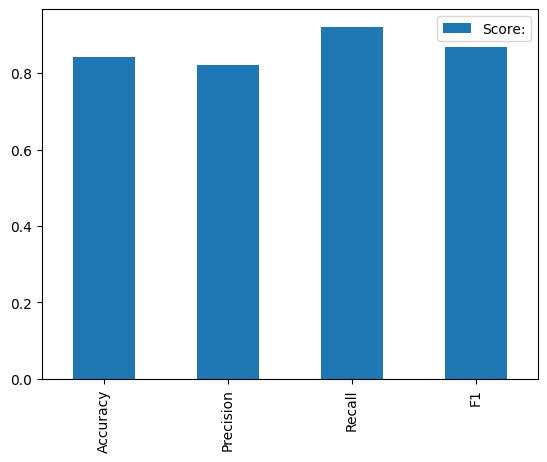

In [14]:
cv_metrics.T.plot.bar()

####next is `Feature importance`